[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


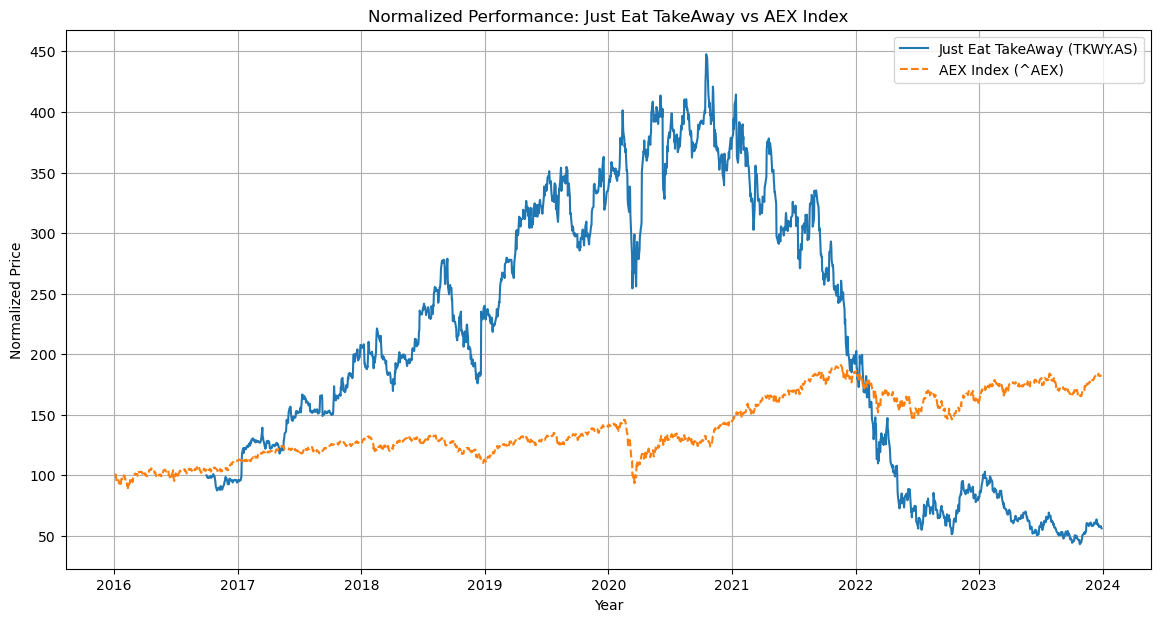

TypeError: unsupported format string passed to Series.__format__

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Configurar os tickers
ticker_justeat = 'TKWY.AS'  # Just Eat TakeAway
ticker_aex = '^AEX'         # Índice AEX

# Baixar os dados históricos (últimos 5 anos)
start_date = '2016-01-01'
end_date = '2023-12-31'

data_justeat = yf.download(ticker_justeat, start=start_date, end=end_date)
data_aex = yf.download(ticker_aex, start=start_date, end=end_date)

# Ajustar para preços de fechamento
justeat_close = data_justeat['Adj Close']
aex_close = data_aex['Adj Close']

# Normalizar os preços para comparabilidade
justeat_norm = justeat_close / justeat_close.iloc[0] * 100
aex_norm = aex_close / aex_close.iloc[0] * 100

# Calcular retornos diários
justeat_returns = justeat_close.pct_change()
aex_returns = aex_close.pct_change()

# Calcular volatilidade (desvio padrão dos retornos)
justeat_volatility = justeat_returns.std() * (252 ** 0.5)  # Anualizado
aex_volatility = aex_returns.std() * (252 ** 0.5)  # Anualizado

# Plotar o desempenho normalizado
plt.figure(figsize=(14, 7))
plt.plot(justeat_norm, label='Just Eat TakeAway (TKWY.AS)')
plt.plot(aex_norm, label='AEX Index (^AEX)', linestyle='--')
plt.title('Normalized Performance: Just Eat TakeAway vs AEX Index')
plt.xlabel('Year')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

# Exibir resultados
print(f"Volatilidade anualizada da Just Eat TakeAway: {justeat_volatility:.2%}")
print(f"Volatilidade anualizada do índice AEX: {aex_volatility:.2%}")

In [19]:
import yfinance as yf
import pandas as pd

# Configurar os tickers
ticker_justeat = 'TKWY.AS'  # Just Eat TakeAway
ticker_aex = '^AEX'         # Índice AEX

# Baixar os dados históricos (últimos 5 anos)
start_date = '2016-01-01'
end_date = '2023-12-31'

data_justeat = yf.download(ticker_justeat, start=start_date, end=end_date)
data_aex = yf.download(ticker_aex, start=start_date, end=end_date)

# Ajustar para preços de fechamento
justeat_close = data_justeat['Adj Close']
aex_close = data_aex['Adj Close']

# Combinar as séries em um DataFrame e alinhar os índices
df = pd.concat([justeat_close, aex_close], axis=1, keys=['JustEat_Close', 'AEX_Close']).dropna()

# Remover o fuso horário do índice
df.index = df.index.tz_localize(None)

# Normalizar os preços para comparabilidade
df['JustEat_Normalized'] = df['JustEat_Close'] / df['JustEat_Close'].iloc[0] * 100
df['AEX_Normalized'] = df['AEX_Close'] / df['AEX_Close'].iloc[0] * 100



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Configurar os tickers
ticker_justeat = 'TKWY.AS'  # Just Eat TakeAway
ticker_aex = '^AEX'         # Índice AEX

# Baixar os dados históricos (últimos 5 anos)
start_date = '2016-01-01'
end_date = '2023-12-31'

data_justeat = yf.download(ticker_justeat, start=start_date, end=end_date)
data_aex = yf.download(ticker_aex, start=start_date, end=end_date)

# Ajustar para preços de fechamento
justeat_close = data_justeat['Adj Close']
aex_close = data_aex['Adj Close']

# Combinar as séries em um DataFrame e alinhar os índices
df = pd.concat([justeat_close, aex_close], axis=1, keys=['JustEat_Close', 'AEX_Close']).dropna()

# Remover o fuso horário do índice
df.index = df.index.tz_localize(None)

# Normalizar os preços para comparabilidade
df['JustEat_Normalized'] = df['JustEat_Close'] / df['JustEat_Close'].iloc[0] * 100
df['AEX_Normalized'] = df['AEX_Close'] / df['AEX_Close'].iloc[0] * 100

# Ajustar as datas para o formato padrão do Excel
df.index = df.index.strftime('%d/%m/%Y')

# Salvar os dados em um arquivo Excel
df.to_excel('normalized_performance.xlsx', index=True)

print("Dados salvos em 'normalized_performance.xlsx'. Agora você pode criar o gráfico no Excel.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Dados salvos em 'normalized_performance.xlsx'. Agora você pode criar o gráfico no Excel.


In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Configurar os tickers
ticker_justeat = 'TKWY.AS'  # Just Eat TakeAway
ticker_aex = '^AEX'         # Índice AEX

# Baixar os dados históricos (últimos 5 anos)
start_date = '2018-01-01'
end_date = '2024-12-31'

data_justeat = yf.download(ticker_justeat, start=start_date, end=end_date)
data_aex = yf.download(ticker_aex, start=start_date, end=end_date)

# Ajustar para preços de fechamento
justeat_close = data_justeat['Close']  # Usando o preço de fechamento original (não ajustado)
aex_close = data_aex['Close']

# Combinar as séries em um DataFrame e alinhar os índices
df = pd.concat([justeat_close, aex_close], axis=1, keys=['JustEat_Close', 'AEX_Close']).dropna()

# Remover o fuso horário do índice
df.index = df.index.tz_localize(None)

# Normalizar os preços para comparabilidade
df['JustEat_Normalized'] = df['JustEat_Close'] / df['JustEat_Close'].iloc[0] * 100
df['AEX_Normalized'] = df['AEX_Close'] / df['AEX_Close'].iloc[0] * 100

# Encontrar o maior e o menor preço de fechamento da Just Eat TakeAway
max_price = df['JustEat_Close'].max()
min_price = df['JustEat_Close'].min()

# Exibir os resultados
print(f"Maior preço de fechamento da Just Eat TakeAway (não ajustado): {max_price:.2f} EUR em {max_date}")
print(f"Menor preço de fechamento da Just Eat TakeAway (não ajustado): {min_price:.2f} EUR em {min_date}")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TypeError: unsupported format string passed to Series.__format__

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Configurar os tickers
ticker_justeat = 'TKWY.AS'  # Just Eat TakeAway
ticker_aex = '^AEX'         # Índice AEX

# Baixar os dados históricos (últimos 5 anos)
start_date = '2016-01-01'
end_date = '2023-12-31'

data_justeat = yf.download(ticker_justeat, start=start_date, end=end_date)
data_aex = yf.download(ticker_aex, start=start_date, end=end_date)

# Usar o preço de fechamento (não ajustado)
justeat_close = data_justeat['Close']
aex_close = data_aex['Close']

# Combinar as séries em um DataFrame e alinhar os índices
df = pd.concat([justeat_close, aex_close], axis=1, keys=['JustEat_Close', 'AEX_Close']).dropna()

# Remover o fuso horário do índice
df.index = df.index.tz_localize(None)

# Normalizar os preços para comparabilidade
df['JustEat_Normalized'] = df['JustEat_Close'] / df['JustEat_Close'].iloc[0] * 100
df['AEX_Normalized'] = df['AEX_Close'] / df['AEX_Close'].iloc[0] * 100

# Encontrar o maior e o menor preço de fechamento da Just Eat TakeAway (não ajustado)
max_price = df['JustEat_Close'].max()
min_price = df['JustEat_Close'].min()
max_date = df['JustEat_Close'].idxmax().strftime('%d/%m/%Y')
min_date = df['JustEat_Close'].idxmin().strftime('%d/%m/%Y')

# Exibir os resultados
print(f"Maior preço de fechamento da Just Eat TakeAway (não ajustado): {max_price:.2f} EUR em {max_date}")
print(f"Menor preço de fechamento da Just Eat TakeAway (não ajustado): {min_price:.2f} EUR em {min_date}")

# Salvar os dados em um arquivo Excel
df.to_excel('normalized_performance.xlsx', index=True)

print("Dados salvos em 'normalized_performance.xlsx'. Agora você pode criar o gráfico no Excel.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AttributeError: 'Series' object has no attribute 'strftime'

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Configurar os tickers
ticker_justeat = 'TKWY.AS'  # Just Eat TakeAway
ticker_eurostoxx = '^STOXX50E'  # Euro Stoxx 50

# Baixar os dados históricos (últimos 5 anos)
start_date = '2018-01-01'
end_date = '2024-12-31'

data_justeat = yf.download(ticker_justeat, start=start_date, end=end_date)
data_eurostoxx = yf.download(ticker_eurostoxx, start=start_date, end=end_date)

# Ajustar para preços de fechamento
justeat_close = data_justeat['Adj Close']
eurostoxx_close = data_eurostoxx['Adj Close']

# Combinar as séries em um DataFrame e alinhar os índices
df = pd.concat([justeat_close, eurostoxx_close], axis=1, keys=['JustEat_Close', 'EuroStoxx_Close']).dropna()

# Remover o fuso horário do índice
df.index = df.index.tz_localize(None)

# Normalizar os preços para comparabilidade
df['JustEat_Normalized'] = df['JustEat_Close'] / df['JustEat_Close'].iloc[0] * 100
df['EuroStoxx_Normalized'] = df['EuroStoxx_Close'] / df['EuroStoxx_Close'].iloc[0] * 100

# Ajustar as datas para o formato padrão do Excel
df.index = df.index.strftime('%d/%m/%Y')

# Salvar os dados em um arquivo Excel
df.to_excel('normalized_performance.xlsx', index=True)

print("Dados salvos em 'normalized_performance.xlsx'. Agora você pode criar o gráfico no Excel.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Dados salvos em 'normalized_performance.xlsx'. Agora você pode criar o gráfico no Excel.
